# Tugas Kecil 2 IF3170 Inteligensi Buatan
### Exploratory Data Analysis
### Author
- Muhammad Hanan / 13521041
- Vieri Fajar Firdaus / 13521099


### Inisialisasi library dan data


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

df1 = pd.read_csv('data/data_train.csv')
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


In [37]:
numerik=[1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1]

### Pertanyaan
- Lakukan analisis data latih terhadap hal berikut. Insight apa yang kalian dapatkan?
- Statistik dasar (mean, min, max, dll)
- Duplicate value
- Missing value
- Outlier untuk kolom numerik: distribusi data (plot dan analisis kurtosis)
- Outlier untuk kolom non numerik: bar chart
- Korelasi dengan kolom target

## Deskripsi Data

Menuliskan deskripsi statistika (_descriptive statistics_) dari semua kolom dada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR (_interquartile range_), _skewness_, dan _kurtosis_.

## Deskripsi Kolom

1. battery_power: Total energi baterai dalam satu waktu diukur dalam mAh
2. blue: Memiliki bluetooth atau tidak
3. clock_speed: Kecepatan mikroprosesor menjalankan instruksi
4. dual_sim: Memiliki dukungan dual sim atau tidak
5. fc: Resolusi kamera depan dalam megapiksel
6. four_g: Memiliki 4G atau tidak
7. int_memory: Memori internal dalam gigabyte
8. m_dep: Ketebalan ponsel dalam cm
9. mobile_wt: Berat ponsel
10. n_cores: Jumlah core prosesor
11. pc: Resolusi kamera utama dalam megapiksel
12. px_height: Tinggi resolusi piksel
13. px_width: Lebar resolusi piksel
14. ram: Ukuran RAM dalam megabyte
15. sc_h: Tinggi layar ponsel dalam cm
16. sc_w: Lebar layar ponsel dalam cm
17. talk_time: Waktu telepon maksimum dalam satu kali pengisian baterai
18. three_g: Memiliki 3G atau tidak
19. touch_screen: Memiliki layar sentuh atau tidak
20. wifi: Memiliki wifi atau tidak
21. price_range (target): Rentang harga dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) atau 3 (biaya sangat tinggi).


**Tipe data setiap kolom**

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_sc

**Deskripsi dari setiap kolom**

In [39]:
modus = {}
for i in df1.columns:
    mode = ''
    first = True
    for j in df1[i].mode():
        if first:
            mode = mode + str(j)
            first = False
        else:
            mode = mode + ', ' + str(j)
    modus[i] = mode


In [40]:
df = pd.DataFrame()
df['Mean'] = df1.mean()
df['Median'] = df1.median()
df['Modus'] = modus
df['Standar Deviasi'] = df1.std()
df['Variasi'] = df1.var()
df['Range'] = df1.max()-df1.min()
df['Kuartil 1'] = df1.quantile(0.25)
df['Kuartil 2'] = df1.quantile(0.5)
df['Kuartil 3'] = df1.quantile(0.75)
df['IQR'] = df['Kuartil 3']-df['Kuartil 1']
df['Skewness'] = df1.skew()
df['Kurtosis'] = df1.kurtosis()
df

,Mean,Median,Modus,Standar Deviasi,Variasi,Range,Kuartil 1,Kuartil 2,Kuartil 3,IQR,Skewness,Kurtosis
battery_power,1237.145714,1219.0,battery_power,430.051785,1.849445e+05,1497.0,864.75,1219.0,1602.00,737.25,0.041901,-1.168068
blue,0.493571,0.0,blue,0.500137,2.501373e-01,1.0,0.00,0.0,1.00,1.00,0.025744,-2.002200
clock_speed,1.521714,1.5,clock_speed,0.814723,6.637740e-01,2.5,0.70,1.5,2.20,1.50,0.166399,-1.329523
dual_sim,0.502857,1.0,dual_sim,0.500171,2.501705e-01,1.0,0.00,1.0,1.00,1.00,-0.011441,-2.002732
fc,4.275000,3.0,fc,4.324170,1.869845e+01,19.0,1.00,3.0,7.00,6.00,1.020324,0.293404
four_g,0.530000,1.0,four_g,0.499278,2.492781e-01,1.0,0.00,1.0,1.00,1.00,-0.120346,-1.988360
int_memory,31.962143,32.0,int_memory,18.162970,3.298935e+02,62.0,16.00,32.0,48.00,32.00,0.063166,-1.227200
m_dep,0.507857,0.5,m_dep,0.288539,8.325488e-02,0.9,0.20,0.5,0.80,0.60,0.059116,-1.266823
mobile_wt,139.375714,139.0,mobile_wt,35.400803,1.253217e+03,120.0,108.00,139.0,169.00,61.00,0.020013,-1.210202
n_cores,4.481429,4.0,n_cores,2.279836,5.197653e+00,7.0,2.00,4.0,7.00,5.00,0.019913,-1.232209


## Duplicate Value


Duplicate value atau nilai ganda merujuk pada keberadaan data yang sama atau identik pada suatu set data. Dalam konteks pengolahan data atau database, duplicate value dapat terjadi pada satu atau lebih entitas (baris atau rekord) dalam suatu kumpulan data.


In [41]:
def check_duplicate_values(data):
    duplicate_rows = data[data.duplicated()]

    if duplicate_rows.shape[0] == 0:
        print("Tidak terdapat duplicate value")
    else:
        print("Terdapat duplicate value")
        print(duplicate_rows)

check_duplicate_values(df)

Tidak terdapat duplicate value


## Missing Value
Missing value, atau nilai yang hilang, merujuk pada situasi di mana nilai atau data yang seharusnya ada dalam suatu set data tidak tersedia atau tidak terisi. Kondisi ini umumnya terjadi karena beberapa alasan dan dapat memiliki dampak yang signifikan pada analisis data dan pengambilan keputusan.

In [42]:
def check_missing_values(data):
    missing_values = data.isnull().sum()

    if missing_values.sum() == 0:
        print("Tidak terdapat missing values")
    else:
        print("Terdapat missing values: ")
        for column, count in missing_values.items():
            if count > 0:
                print(f"{column}: {count} missing values")

check_missing_values(df1)

Tidak terdapat missing values


## Outlier
Outlier adalah nilai atau observasi yang secara signifikan berbeda dari sebagian besar data dalam suatu set. Outlier dapat mempengaruhi analisis statistik dan model prediktif, dan dapat muncul sebagai hasil dari kesalahan pengukuran, kejadian yang tidak biasa, atau karakteristik alami dari data yang diamati

In [43]:
def box_plot_outliers(df: pd.DataFrame, column: str) -> None:
    fig, ax1 = plt.subplots(figsize=(10, 5))
    g1 = sns.boxplot(data=df, x=column, ax=ax1, color="#03C988", flierprops={
                     "marker": 'o', "markersize": 5, "markeredgecolor": 'black', "markerfacecolor": 'white', "alpha": 0.6})
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    fig.suptitle(column, y=0.95, fontsize=17)

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()

    print(f"Jumlah outlier dalam kolom {column}: {outlier_count}")

#### Kolom battery_power

Jumlah outlier dalam kolom battery_power: 0


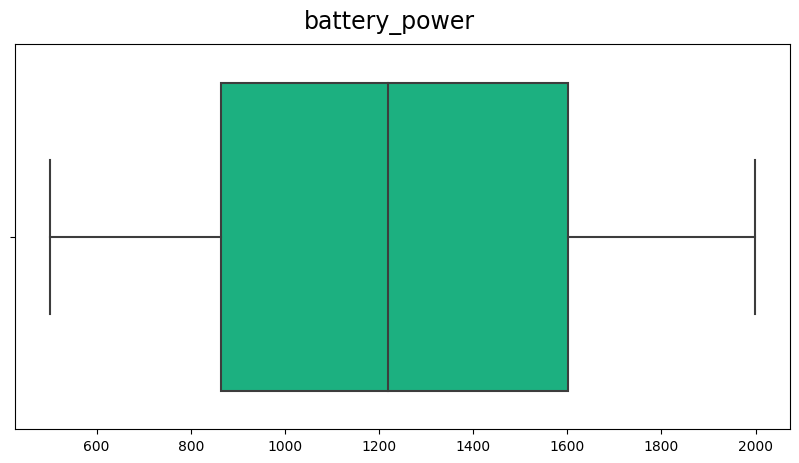

In [44]:
box_plot_outliers(df1,df1.columns[0])

Berdasarkan hasil analisis melalui box plot, data dalam kolom tersebut menunjukkan variasi yang signifikan antara nilai minimum dan maksimum, mencerminkan sebaran data yang cukup luas. Lebih penting lagi, tidak ditemukan adanya outlier yang memiliki nilai lebih rendah atau lebih tinggi dari batas minimum atau maksimum, menunjukkan bahwa data dalam kolom tersebut tampaknya homogen dan konsisten. Hal ini menunjukkan bahwa mayoritas data berada dalam kisaran antara kuartil pertama dan kuartil ketiga, dengan median sebagai nilai tengahnya, yang memberikan gambaran yang cukup representatif tentang distribusi data.

#### Kolom clock_speed

Jumlah outlier dalam kolom clock_speed: 0


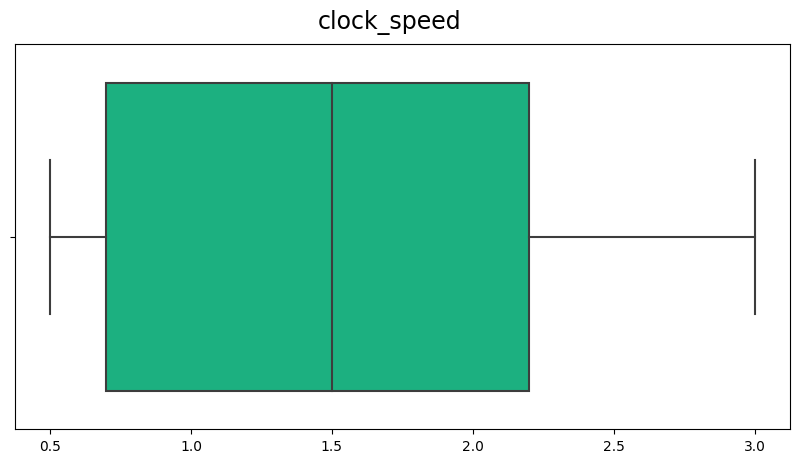

In [45]:
box_plot_outliers(df1,df1.columns[2])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup kecil dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom fc

Jumlah outlier dalam kolom fc: 11


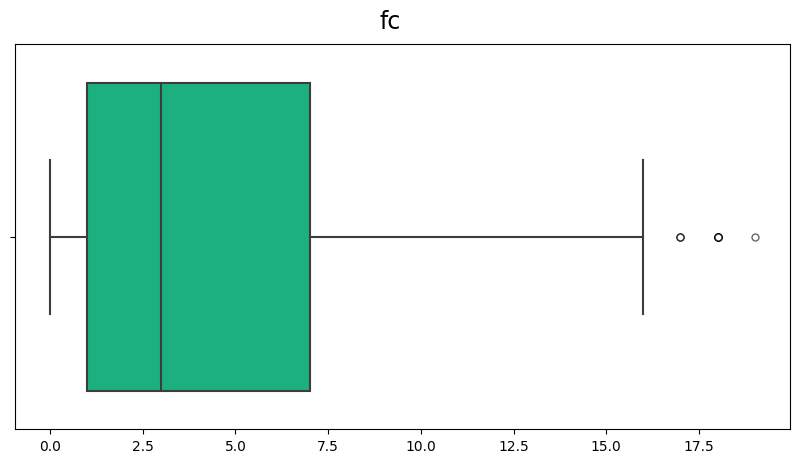

In [46]:
box_plot_outliers(df1,df1.columns[4])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup kecil dan terdapat beberapa outliers yang memiliki nilai yang lebih besar dari titik maksimum.

#### Kolom int_memory

Jumlah outlier dalam kolom int_memory: 0


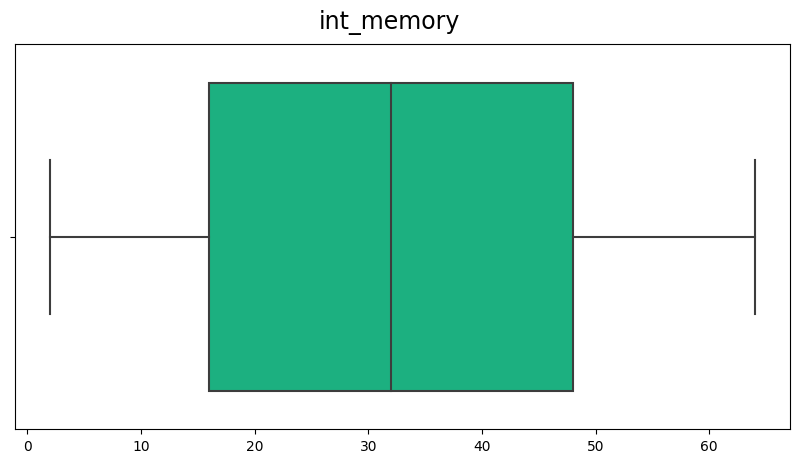

In [47]:
box_plot_outliers(df1,df1.columns[6])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom m_dep

Jumlah outlier dalam kolom m_dep: 0


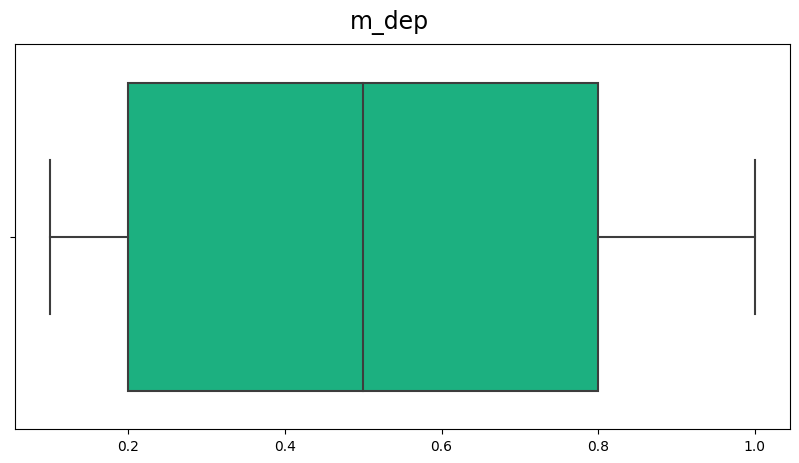

In [48]:
box_plot_outliers(df1,df1.columns[7])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup kecil dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom mobile_wt

Jumlah outlier dalam kolom mobile_wt: 0


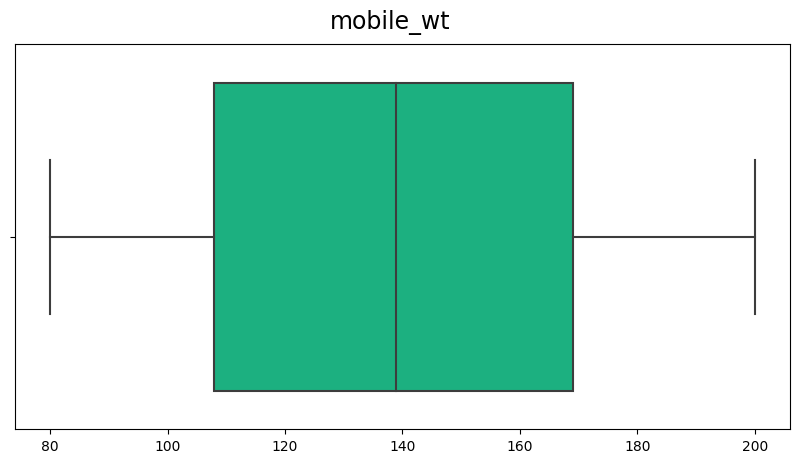

In [49]:
box_plot_outliers(df1,df1.columns[8])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum lumayan besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom n_cores

Jumlah outlier dalam kolom n_cores: 0


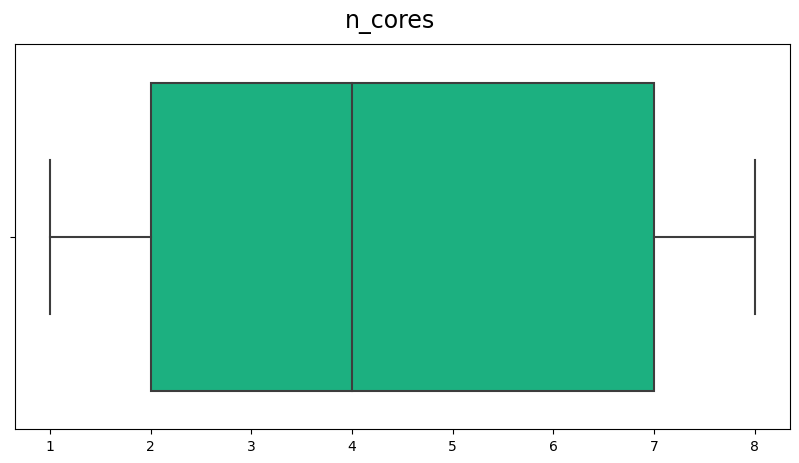

In [50]:
box_plot_outliers(df1,df1.columns[9])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom pc

Jumlah outlier dalam kolom pc: 0


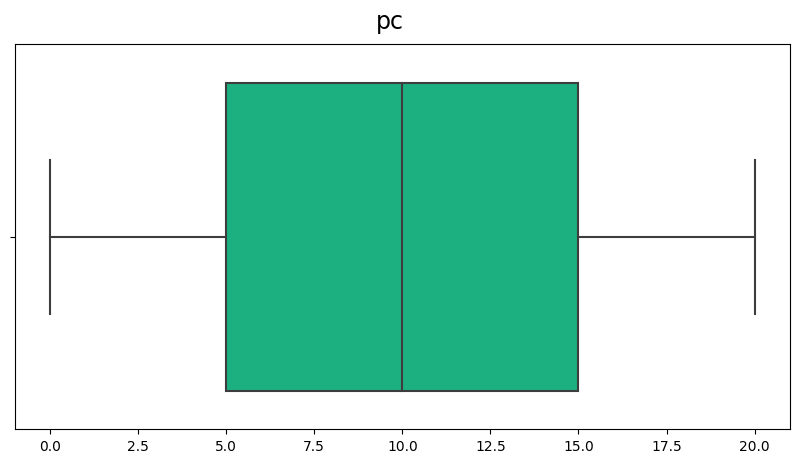

In [51]:
box_plot_outliers(df1,df1.columns[10])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom px_height

Jumlah outlier dalam kolom px_height: 0


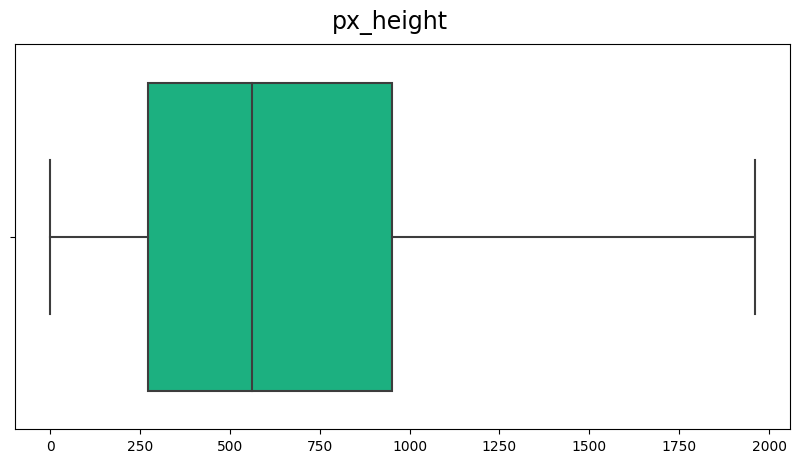

In [52]:
box_plot_outliers(df1,df1.columns[11])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom px_width

Jumlah outlier dalam kolom px_width: 0


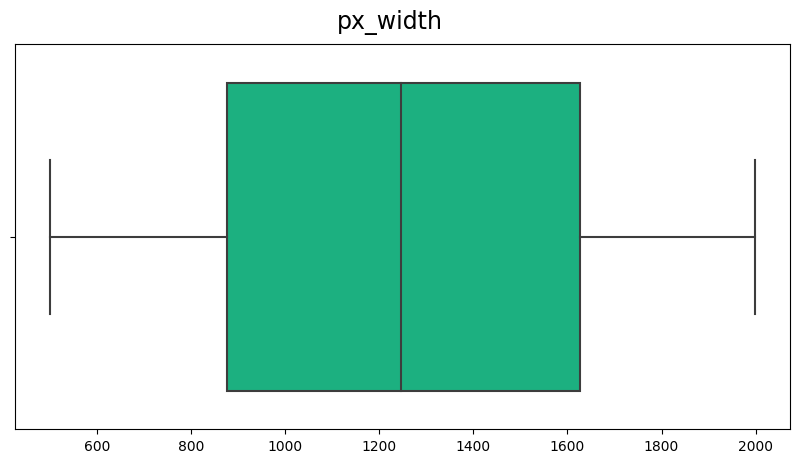

In [53]:
box_plot_outliers(df1,df1.columns[12])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### kolom ram

Jumlah outlier dalam kolom ram: 0


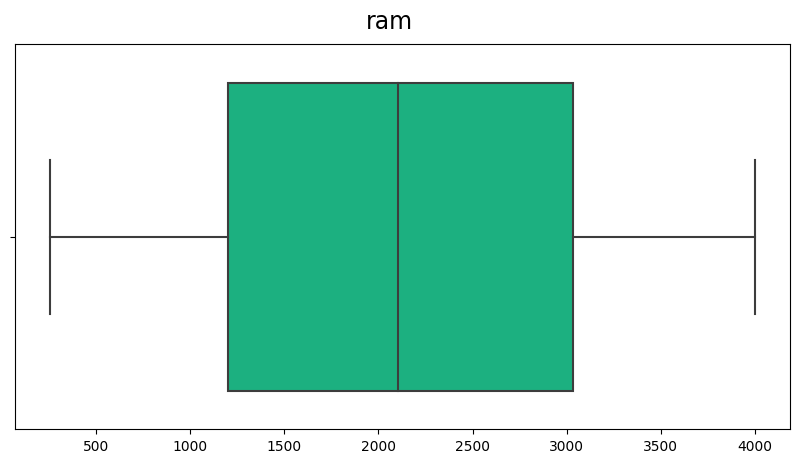

In [54]:
box_plot_outliers(df1,df1.columns[13])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom cs_h

Jumlah outlier dalam kolom sc_h: 0


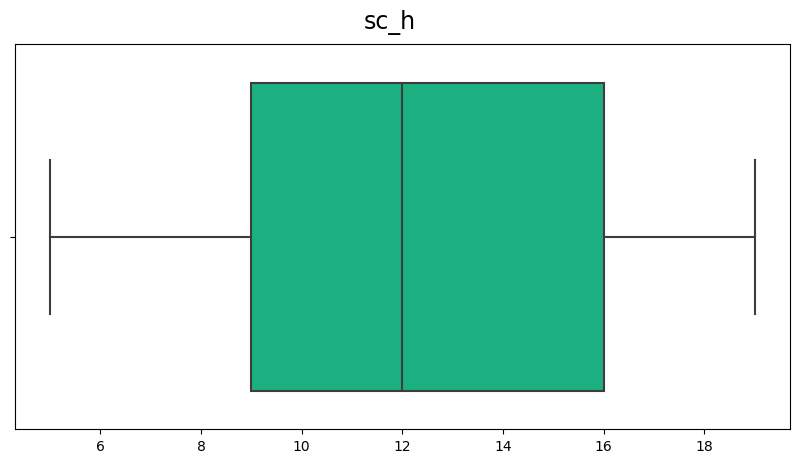

In [55]:
box_plot_outliers(df1,df1.columns[14])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom sc_w

Jumlah outlier dalam kolom sc_w: 0


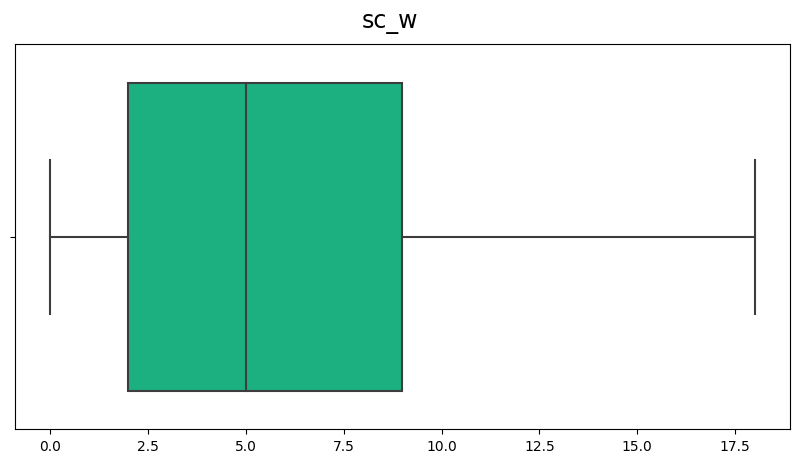

In [56]:
box_plot_outliers(df1,df1.columns[15])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom talk_time

Jumlah outlier dalam kolom talk_time: 0


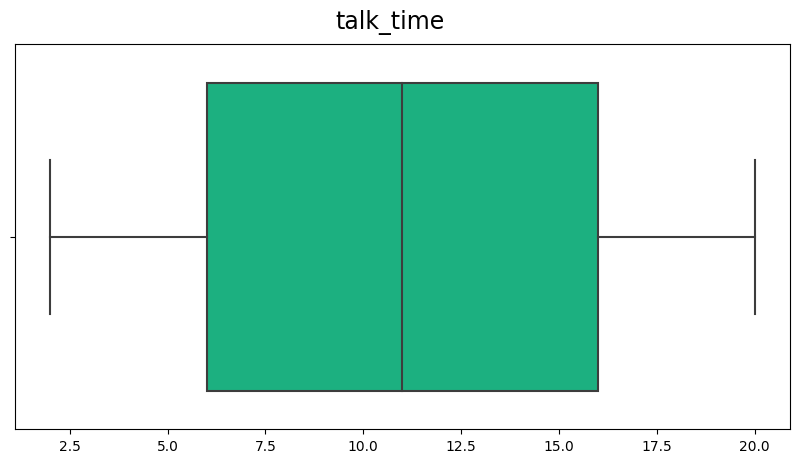

In [57]:
box_plot_outliers(df1,df1.columns[16])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom price_range

Jumlah outlier dalam kolom price_range: 0


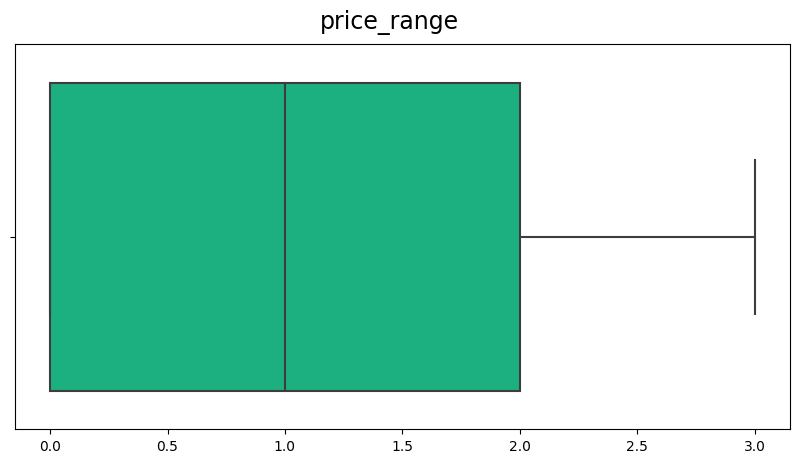

In [58]:
box_plot_outliers(df1,df1.columns[20])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

## Kolom numerik: distribusi data (plot dan analisis kurtosis)
Outlier adalah nilai atau observasi yang secara signifikan berbeda dari sebagian besar data dalam suatu set. Outlier dapat mempengaruhi analisis statistik dan model prediktif, dan dapat muncul sebagai hasil dari kesalahan pengukuran, kejadian yang tidak biasa, atau karakteristik alami dari data yang diamati

## Kolom non numerik: bar chart
Outlier adalah nilai atau observasi yang secara signifikan berbeda dari sebagian besar data dalam suatu set. Outlier dapat mempengaruhi analisis statistik dan model prediktif, dan dapat muncul sebagai hasil dari kesalahan pengukuran, kejadian yang tidak biasa, atau karakteristik alami dari data yang diamati

## Korelasi dengan kolom target
Korelasi adalah suatu konsep dalam statistika yang mengukur sejauh mana dua variabel berkaitan satu sama lain.

In [59]:
def normality(column):
    k2, p = st.normaltest(df1[column])
    alpha = 0.05
    display(
        print("Nilai *D'Agostino's K-squared Test*, p = {:g}".format(p)))
    if p < alpha:
        display(
            print(f"Karena $p < {alpha}$ maka Hipotesis null ditolak, sehingga data kolom {column} tidak terdistribusi normal")
        )
    else:
        display(
            print(f"Karena $p > {alpha}$, maka Hipotesis null tidak ditolak, sehingga data kolom {column} terdistribusi normal")
        )

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=True)
    g1 = sns.histplot(data=df1, x=column, ax=ax1, color="#03c9c9",
                      kde=True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#c91703')
    g1.set(ylabel=None)
    g1.set(xlabel=None)
    fig.suptitle(f"Normality test {column}", y=1, fontsize=17)


Nilai *D'Agostino's K-squared Test*, p = 6.49065e-184


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom battery_power tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom blue tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom clock_speed tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom dual_sim tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 3.58319e-39


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom fc tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom four_g tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 2.04615e-299


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom int_memory tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom m_dep tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 1.15204e-256


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom mobile_wt tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom n_cores tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 2.31058e-178


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom pc tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 4.18069e-21


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom px_height tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 5.58074e-195


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom px_width tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 1.02457e-210


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom ram tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 1.39651e-206


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom sc_h tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 6.52219e-22


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom sc_w tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 1.12216e-220


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom talk_time tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 2.26689e-55


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom three_g tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom touch_screen tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom wifi tidak terdistribusi normal


None

Nilai *D'Agostino's K-squared Test*, p = 0


None

Karena $p < 0.05$ maka Hipotesis null ditolak, sehingga data kolom price_range tidak terdistribusi normal


None

C:\Users\mmuuh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


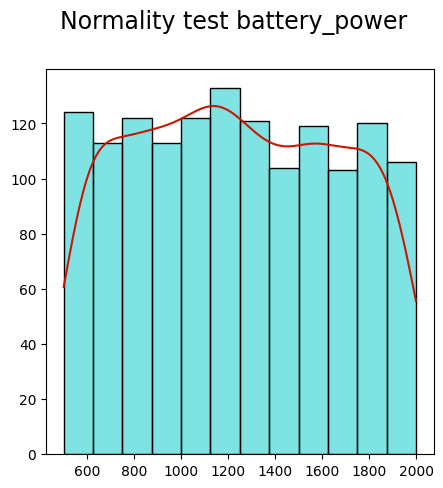

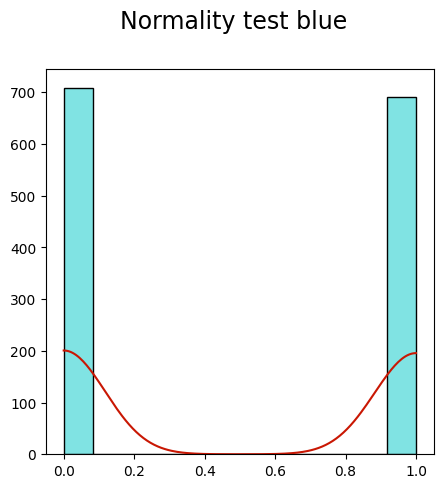

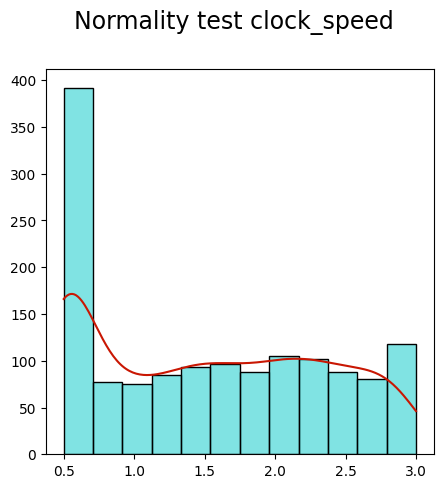

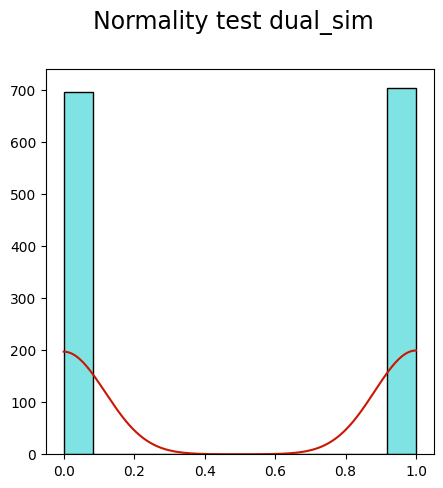

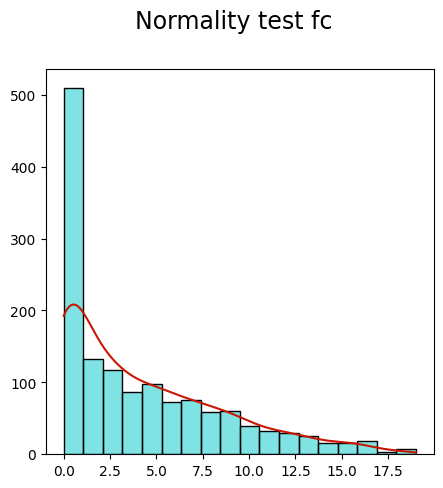

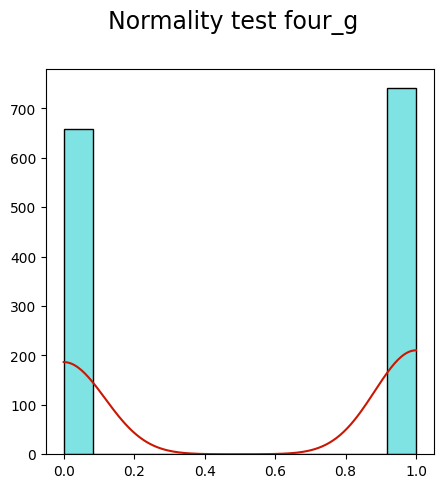

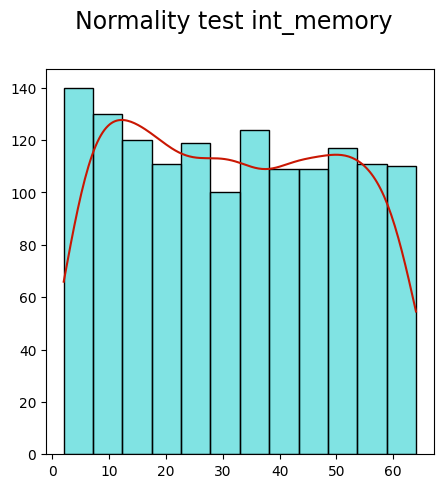

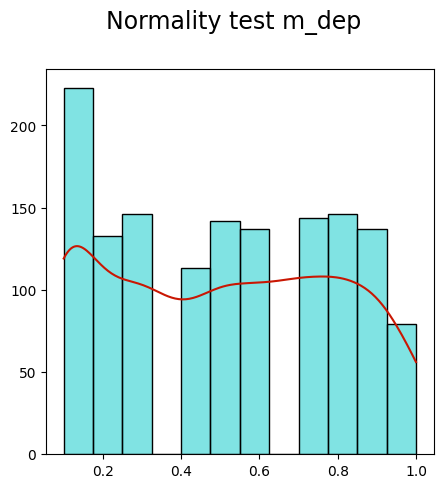

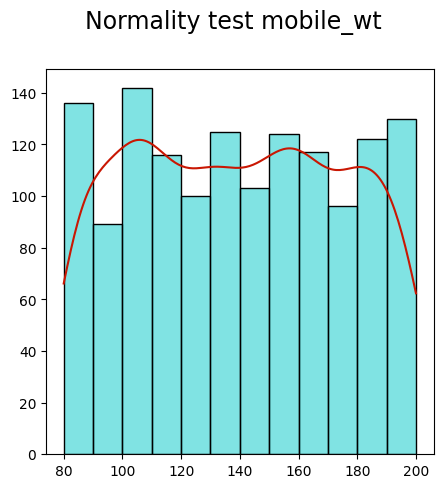

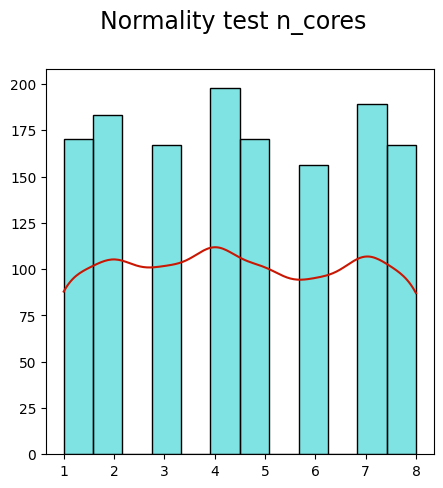

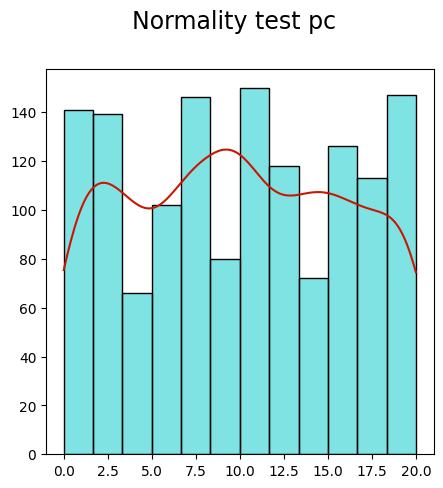

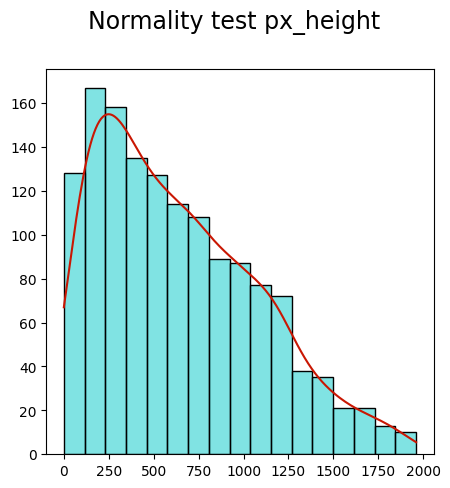

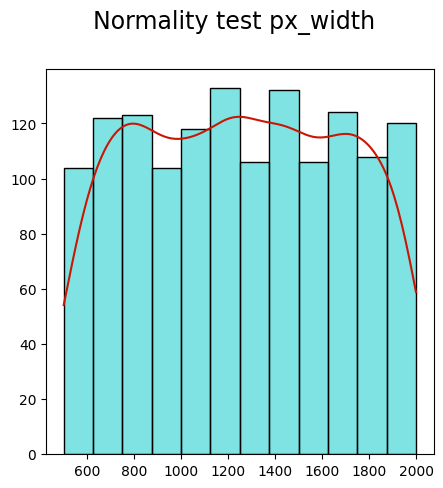

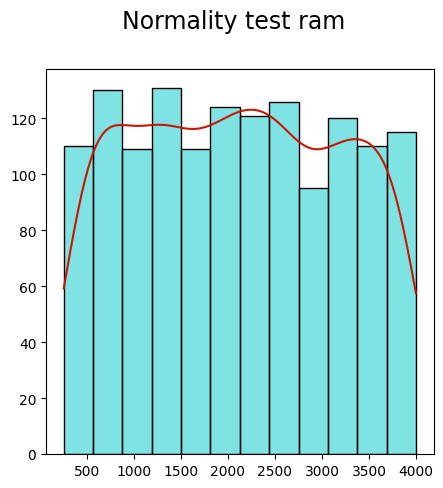

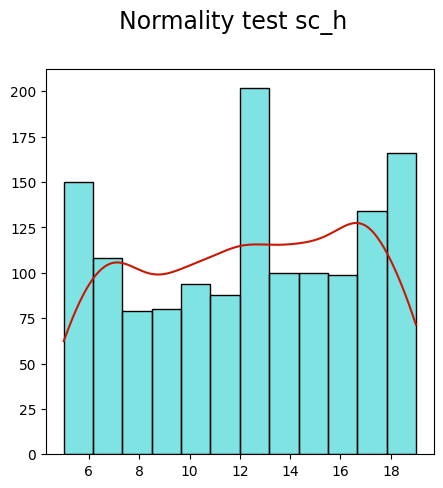

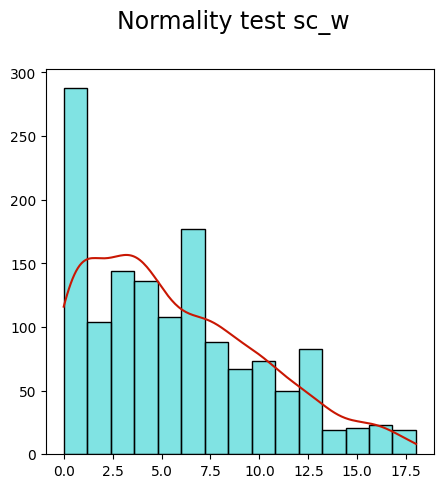

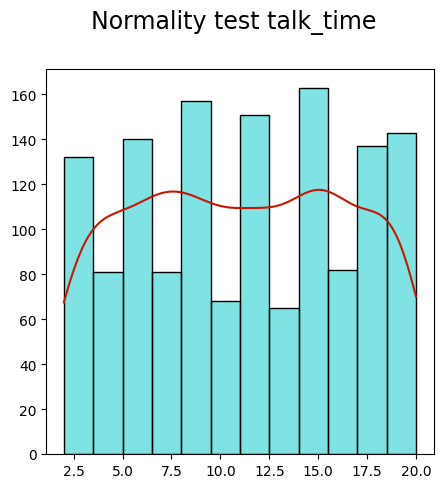

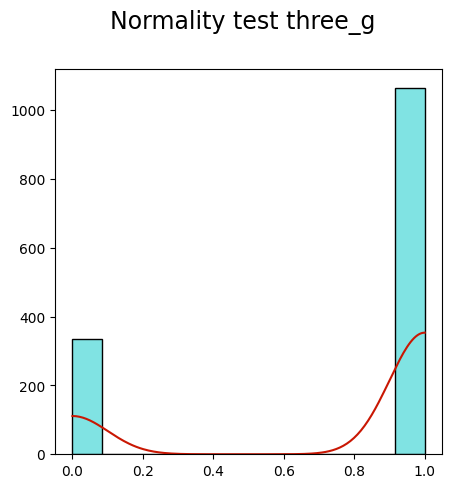

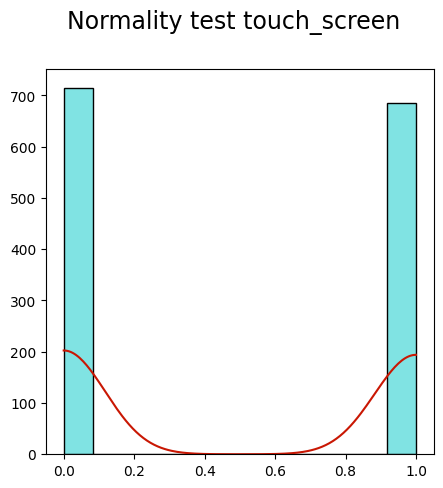

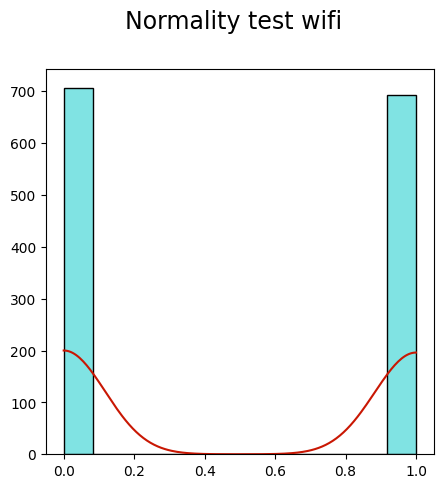

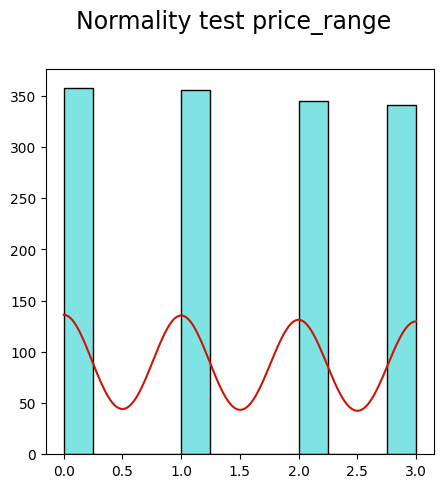

In [60]:
for i in range(len(df1.columns)) :
  normality(df1.columns[i])